### Create Libraries

In [8]:
# Data Processing
import pandas as pd
import numpy as np

# Neural Network
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score,
    ConfusionMatrixDisplay, classification_report, r2_score, mean_squared_error
)
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import numpy as np
import math



### Load Data

In [11]:
training = 'archive/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv'
test = 'archive/Uniqlo(FastRetailing) 2017 Test - stocks2017.csv'

df_train = pd.read_csv(training)
df_test = pd.read_csv(test)

df_train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


### Process Data
- Reformat date (year-month-day) to separate Year Month Date columns

In [14]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
#df_train = df_train.sort_values(by='Date')

df_train.insert(0, 'day', df_train['Date'].dt.day)
df_train.insert(0, 'month', df_train['Date'].dt.month)
df_train.insert(0, 'year', df_train['Date'].dt.year)

df_train = df_train.drop('Date', axis = 1)

df_test['Date'] = pd.to_datetime(df_test['Date'])
#df_test = df_test.sort_values(by='Date')

df_test.insert(0, 'day', df_test['Date'].dt.day)
df_test.insert(0, 'month', df_test['Date'].dt.month)
df_test.insert(0, 'year', df_test['Date'].dt.year)

df_test = df_test.drop('Date', axis = 1)


In [16]:
df_train.head()

,year,month,day,Open,High,Low,Close,Volume,Stock Trading
0,2016,12,30,42120,42330,41700,41830,610000,25628028000
1,2016,12,29,43000,43220,42540,42660,448400,19188227000
2,2016,12,28,43940,43970,43270,43270,339900,14780670000
3,2016,12,27,43140,43700,43140,43620,400100,17427993000
4,2016,12,26,43310,43660,43090,43340,358200,15547803000


In [18]:
df_test.head()

,year,month,day,Open,High,Low,Close,Volume,Stock Trading
0,2017,1,13,38900,39380,38240,38430,1321200,51197289000
1,2017,1,12,38300,38450,37930,38010,800900,30540359000
2,2017,1,11,38710,38880,38480,38560,545900,21089798000
3,2017,1,10,38620,38850,38150,38690,1196900,46107703000
4,2017,1,6,40500,41030,39720,39720,1435500,57708934000


### Splitting Data

In [21]:
X_train = df_train.drop(columns=["Close"])
y_train = df_train["Close"]
X_test = df_test.drop(columns=["Close"])
y_test = df_test["Close"]

In [23]:
print(X_train.shape)
X_train.head()

(1226, 8)


,year,month,day,Open,High,Low,Volume,Stock Trading
0,2016,12,30,42120,42330,41700,610000,25628028000
1,2016,12,29,43000,43220,42540,448400,19188227000
2,2016,12,28,43940,43970,43270,339900,14780670000
3,2016,12,27,43140,43700,43140,400100,17427993000
4,2016,12,26,43310,43660,43090,358200,15547803000


In [24]:
print(y_train.shape)
y_train.head()

(1226,)


0    41830
1    42660
2    43270
3    43620
4    43340
Name: Close, dtype: int64

In [27]:
print(X_test.shape)
X_test.head()

(7, 8)


,year,month,day,Open,High,Low,Volume,Stock Trading
0,2017,1,13,38900,39380,38240,1321200,51197289000
1,2017,1,12,38300,38450,37930,800900,30540359000
2,2017,1,11,38710,38880,38480,545900,21089798000
3,2017,1,10,38620,38850,38150,1196900,46107703000
4,2017,1,6,40500,41030,39720,1435500,57708934000


In [29]:
print(y_test.shape)
y_test.head()

(7,)


0    38430
1    38010
2    38560
3    38690
4    39720
Name: Close, dtype: int64

### Neural Networks

In [32]:
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

#### Test Predictions

In [35]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


#### Model Predictions

In [ ]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Training Mean Squared Error:", mse_train)
print("Testing Mean Squared Error:", mse_test)
print("Training R^2 Score:", r2_train)
print("Testing R^2 Score:", r2_test)

#### PLot the Neural Networks

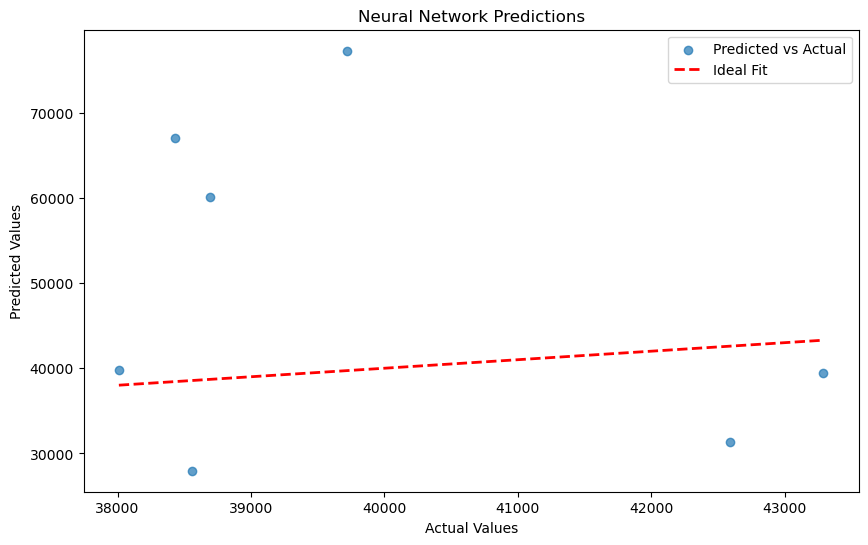

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Neural Network Predictions')
plt.legend()
plt.show()
